# Manipulating tabular data

In [1]:
%matplotlib inline
from IPython.display import Image, IFrame

import pandas as pd
import numpy as np

To note:
- `matplotlib` magic
- Library import and alias

## Data

### Manual download

> [http://insideairbnb.com/get-the-data.html](http://insideairbnb.com/get-the-data.html)


> `listings.csv.gz`


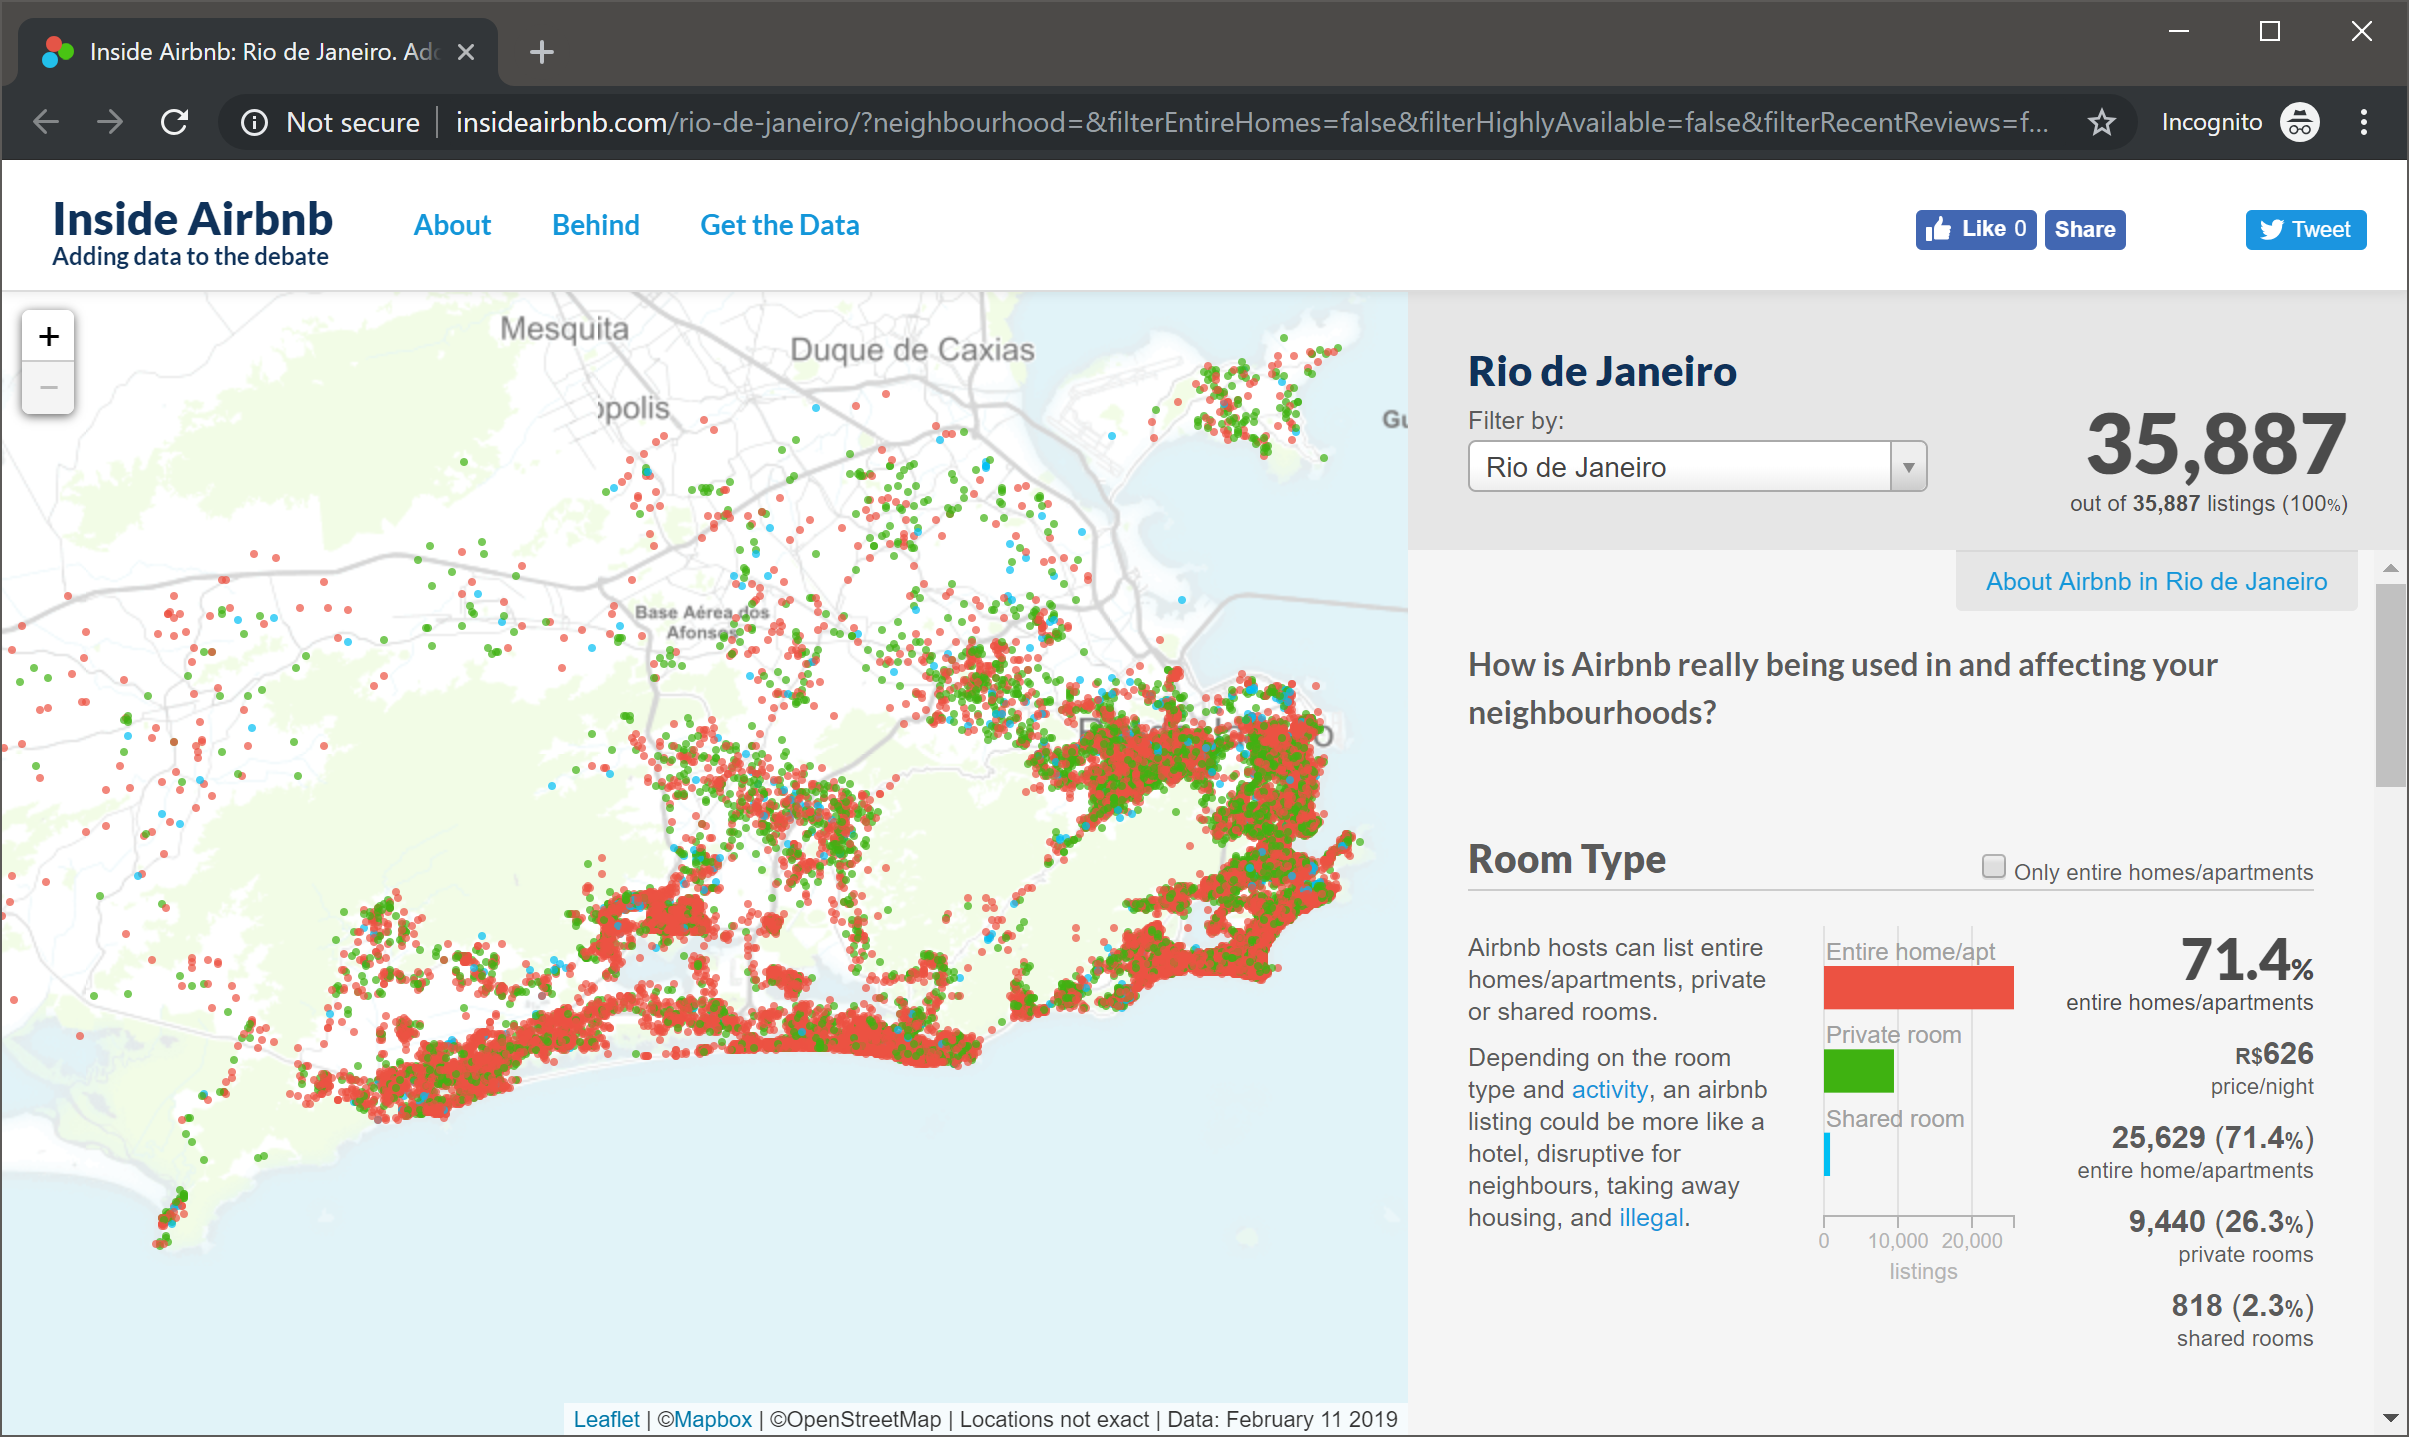

In [2]:
Image('../figs/02_abb.png')

## `File I/O:` Reading data in

In [3]:
%%time

lst = pd.read_csv('../data/listings.csv.gz')

CPU times: user 2.92 s, sys: 150 ms, total: 3.07 s
Wall time: 3.13 s


<string>:2: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.


To note:

* `%%time`  magic
* `read_XXX` pattern
* Path to file
* Reading a compressed (or remote) file
* Storing object `lst`
* Introduce the `DataFrame` and columns (`Series`)

Alternative (needs connection):

In [4]:
url = ('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/'\
       '2019-02-11/data/listings.csv.gz')
#%time lst = pd.read_csv(url)

To note:

* `%time` magic
* `url` object

In [5]:
lst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Columns: 106 entries, id to reviews_per_month
dtypes: float64(24), int64(21), object(61)
memory usage: 29.0+ MB


In [6]:
lst.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [7]:
lst.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20190211015002,2019-02-11,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.11
1,25026,https://www.airbnb.com/rooms/25026,20190211015002,2019-02-11,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,f,f,strict_14_with_grace_period,t,t,3,3,0,0,2.12
2,31560,https://www.airbnb.com/rooms/31560,20190211015002,2019-02-11,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.30
3,34608,https://www.airbnb.com/rooms/34608,20190211015002,2019-02-11,São-Conrado House with Ocean View,NaN,Its a House inside a very good condo with 2...,Its a House inside a very good condo with 2...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,8,5,3,0,NaN
4,35636,https://www.airbnb.com/rooms/35636,20190211015002,2019-02-11,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,"The location is extremely convenient, safe and...",This cosy apartment is just a few steps away ...,none,The apartment street is very quiet and safe ....,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,2.15


In [8]:
lst.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.588700e+04,3.588700e+04,0.0,0.0,0.0,3.588700e+04,0.0,35882.000000,35882.000000,0.0,...,17340.000000,17349.000000,17345.000000,17345.000000,0.0,35887.000000,35887.000000,35887.000000,35887.000000,18372.000000
mean,1.530913e+07,2.019021e+13,NaN,NaN,NaN,6.123589e+07,NaN,8.337049,8.337049,NaN,...,9.779700,9.750591,9.707754,9.321015,NaN,6.703570,5.878257,0.732856,0.092457,0.639674
std,9.225014e+06,0.000000e+00,NaN,NaN,NaN,5.911607e+07,NaN,34.809689,34.809689,NaN,...,0.761192,0.798958,0.766787,1.023608,NaN,25.188517,24.746172,1.906803,0.783568,0.842788
min,1.787800e+04,2.019021e+13,NaN,NaN,NaN,2.616000e+03,NaN,0.000000,0.000000,NaN,...,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,9.258290e+06,2.019021e+13,NaN,NaN,NaN,1.366422e+07,NaN,1.000000,1.000000,NaN,...,10.000000,10.000000,10.000000,9.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.090000
50%,1.391005e+07,2.019021e+13,NaN,NaN,NaN,4.861991e+07,NaN,1.000000,1.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.290000
75%,2.226164e+07,2.019021e+13,NaN,NaN,NaN,8.373869e+07,NaN,3.000000,3.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,2.000000,1.000000,0.000000,0.830000
max,3.228866e+07,2.019021e+13,NaN,NaN,NaN,2.422905e+08,NaN,481.000000,481.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,237.000000,231.000000,40.000000,18.000000,9.200000


## Types of data

### Decimal data

In [9]:
type(lst['review_scores_rating'][0])

numpy.float64

In [10]:
lst['review_scores_rating'].head()

0    93.0
1    94.0
2    96.0
3     NaN
4    94.0
Name: review_scores_rating, dtype: float64

In [11]:
type(lst)

pandas.core.frame.DataFrame

In [12]:
type(lst['review_scores_rating'])

pandas.core.series.Series

In [13]:
lst['review_scores_rating'].describe()

count    17361.000000
mean        94.510051
std          9.337065
min         20.000000
25%         93.000000
50%         98.000000
75%        100.000000
max        100.000000
Name: review_scores_rating, dtype: float64

To note:

- Pulling out a column (`[]` pattern)
- Missing values (`NaN`)
- Use of `.describe()`

### Counts

In [14]:
lst['bedrooms'].head()

0    2.0
1    1.0
2    1.0
3    5.0
4    1.0
Name: bedrooms, dtype: float64

### Binary

In [15]:
lst['instant_bookable'].tail()

35882    f
35883    f
35884    f
35885    f
35886    f
Name: instant_bookable, dtype: object

In [16]:
lst['instant_bookable'] == 't'

0         True
1        False
2         True
3        False
4        False
5         True
6        False
7         True
8         True
9         True
10        True
11        True
12       False
13        True
14       False
15       False
16       False
17        True
18       False
19        True
20       False
21        True
22        True
23       False
24       False
25       False
26        True
27        True
28        True
29       False
         ...  
35857     True
35858     True
35859     True
35860     True
35861    False
35862     True
35863     True
35864     True
35865     True
35866    False
35867    False
35868     True
35869    False
35870     True
35871     True
35872     True
35873     True
35874     True
35875    False
35876    False
35877     True
35878    False
35879     True
35880    False
35881    False
35882    False
35883    False
35884    False
35885    False
35886    False
Name: instant_bookable, Length: 35887, dtype: bool

### Categorical

In [17]:
lst['property_type'].head()

0    Condominium
1      Apartment
2      Apartment
3          House
4      Apartment
Name: property_type, dtype: object

In [18]:
lst['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [19]:
lst['room_type_cat'] = pd.Categorical(lst['room_type'])

### Dates

In [20]:
d = pd.to_datetime(lst['last_scraped'])

In [21]:
lst['last_scraped'].head()

0    2019-02-11
1    2019-02-11
2    2019-02-11
3    2019-02-11
4    2019-02-11
Name: last_scraped, dtype: object

In [22]:
d.head()

0   2019-02-11
1   2019-02-11
2   2019-02-11
3   2019-02-11
4   2019-02-11
Name: last_scraped, dtype: datetime64[ns]

In [23]:
t = d[0]
t

Timestamp('2019-02-11 00:00:00')

In [24]:
lst['last_scraped'][0]

'2019-02-11'

In [25]:
t.year

2019

To note:
- Use of `pd.to_datetime`
- `Timestamp` objects
- Tab completion to explore other contents

### Spatial

[See [this afternoon](lab_03.ipynb)]

## Indices

In [26]:
lst['listing_url'][0]

'https://www.airbnb.com/rooms/17878'

In [27]:
lst.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_cat
0,17878,https://www.airbnb.com/rooms/17878,20190211015002,2019-02-11,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,...,f,strict_14_with_grace_period,f,f,1,1,0,0,2.11,Entire home/apt
1,25026,https://www.airbnb.com/rooms/25026,20190211015002,2019-02-11,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,f,strict_14_with_grace_period,t,t,3,3,0,0,2.12,Entire home/apt


To note:

* What is an `Index`
* Default index

In [28]:
lst.set_index('id').head(2)

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_cat
id,,,,,,,,,,,,,,,,,,,,,
17878,https://www.airbnb.com/rooms/17878,20190211015002,2019-02-11,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,NaN,...,f,strict_14_with_grace_period,f,f,1,1,0,0,2.11,Entire home/apt
25026,https://www.airbnb.com/rooms/25026,20190211015002,2019-02-11,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,"For any stay superior to 15 days, an additiona...",...,f,strict_14_with_grace_period,t,t,3,3,0,0,2.12,Entire home/apt


A few more things to note about `DataFrame` objects:

- Two dimensional "labelled" arrays
- Mixed classes
- `NaN` native support
- In-memory database (indices provide fast query and manipulation)

## Wrangling patterns


### Index-based queries

In [29]:
lst['review_scores_location'].head()

0    10.0
1    10.0
2    10.0
3     NaN
4    10.0
Name: review_scores_location, dtype: float64

In [30]:
lst.loc[0, 'review_scores_location']

10.0

In [31]:
lst.loc[:, 'review_scores_location'].head()

0    10.0
1    10.0
2    10.0
3     NaN
4    10.0
Name: review_scores_location, dtype: float64

In [32]:
lst.loc[0, :]

id                                                                                          17878
listing_url                                                    https://www.airbnb.com/rooms/17878
scrape_id                                                                          20190211015002
last_scraped                                                                           2019-02-11
name                                                            Very Nice 2Br - Copacabana - WiFi
summary                                         Please note that special rates apply for New Y...
space                                           - large balcony which looks out on pedestrian ...
description                                     Please note that special rates apply for New Y...
experiences_offered                                                                          none
neighborhood_overview                           This is the best spot in Rio. Everything happe...
notes               

To note:

* `loc[dim1, dim2]` operator
* Use of `:` wildcard

In [33]:
lst.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_cat
0,17878,https://www.airbnb.com/rooms/17878,20190211015002,2019-02-11,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,...,f,strict_14_with_grace_period,f,f,1,1,0,0,2.11,Entire home/apt


In [34]:
lst.loc[0:3, "listing_url": "name"]

,listing_url,scrape_id,last_scraped,name
0,https://www.airbnb.com/rooms/17878,20190211015002,2019-02-11,Very Nice 2Br - Copacabana - WiFi
1,https://www.airbnb.com/rooms/25026,20190211015002,2019-02-11,Beautiful Modern Decorated Studio in Copa
2,https://www.airbnb.com/rooms/31560,20190211015002,2019-02-11,NICE & COZY 1BDR - IPANEMA BEACH
3,https://www.airbnb.com/rooms/34608,20190211015002,2019-02-11,São-Conrado House with Ocean View


In [35]:
lst.loc[0:5, ['review_scores_location', \
               'review_scores_accuracy']]

,review_scores_location,review_scores_accuracy
0,10.0,9.0
1,10.0,9.0
2,10.0,10.0
3,NaN,NaN
4,10.0,10.0
5,10.0,10.0


To note:

* Delimitted range (`0:5`) + zero-offset and order in Python
* List of elements (`['review_scores_location', 'review_scores_accuracy']`)
* Use of line break (`\`)

In [36]:
lst.set_index('id').loc[0:5, :]

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_cat
id,,,,,,,,,,,,,,,,,,,,,


In [37]:
lst.set_index('id').loc[1419:23691, :]

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_cat
id,,,,,,,,,,,,,,,,,,,,,
17878,https://www.airbnb.com/rooms/17878,20190211015002,2019-02-11,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,NaN,...,f,strict_14_with_grace_period,f,f,1,1,0,0,2.11,Entire home/apt


In [38]:
lst.set_index('id').loc[[17878, 31560, 34608], 
                        'review_scores_accuracy']

id
17878     9.0
31560    10.0
34608     NaN
Name: review_scores_accuracy, dtype: float64

To note:

* `loc` operates on indices only!
* Ranges are allowed
* Enforce your own order if you pass a list (useful for columns!)

In [39]:
lst.set_index('id').iloc[0:5, [10, 11]]

,transit,access
id,,
17878,Excellent location. Close to all major public ...,The entire apartment is yours. It is a vacatio...
25026,At night we recommend you to take taxis only. ...,"internet wi-fi, cable tv, air cond, ceiling fa..."
31560,"Bus, U-Bahn, Taxi und Leihfahrräder in der Nähe.","Die Urlauber dürfen das Badezimmer benutzen, d..."
34608,NaN,NaN
35636,Metro stop just 5 blocks from our place. Buses...,NaN


To note:

* Operator `iloc` is positional, irrespective of indices
* Both ranges and lists are allowed

### Value-based queries

In [40]:
lst.query('bedrooms > 1').head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_cat
0,17878,https://www.airbnb.com/rooms/17878,20190211015002,2019-02-11,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,...,f,strict_14_with_grace_period,f,f,1,1,0,0,2.11,Entire home/apt
3,34608,https://www.airbnb.com/rooms/34608,20190211015002,2019-02-11,São-Conrado House with Ocean View,NaN,Its a House inside a very good condo with 2...,Its a House inside a very good condo with 2...,none,NaN,...,f,strict_14_with_grace_period,f,f,8,5,3,0,NaN,Entire home/apt
7,48305,https://www.airbnb.com/rooms/48305,20190211015002,2019-02-11,"Beach Block 6bed Penthouse, Ipanema Best Locat...","Sunny terrace with side ocean view, 6 ensuite ...",••• WHY AND HOW WE DIFFER ••• Our guest loves ...,"Sunny terrace with side ocean view, 6 ensuite ...",none,"Located right on Ipanema Beach, Posto 9, only ...",...,f,strict_14_with_grace_period,f,f,7,5,2,0,0.40,Entire home/apt
9,48901,https://www.airbnb.com/rooms/48901,20190211015002,2019-02-11,Special deal 4 BR beach corner,Very confortable and safe this 4/4 unit is wel...,"Excellent 4 bedroom apartment, located on Copa...",Very confortable and safe this 4/4 unit is wel...,none,"Excelent supermarket, varied stores and restau...",...,f,strict_14_with_grace_period,f,f,3,3,0,0,0.07,Entire home/apt
11,50294,https://www.airbnb.com/rooms/50294,20190211015002,2019-02-11,Beach Block 3Bed ensuite in Ipanema Best Locat...,Our guests love staying with us! We have hoste...,"DETAILS: Recently renovated apartment, in resi...",Our guests love staying with us! We have hoste...,none,"Right by the famous ""Posto 9"", the building is...",...,f,strict_14_with_grace_period,f,f,7,5,2,0,0.68,Entire home/apt


In [41]:
lst.query('bedrooms >= 1').head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_cat
0,17878,https://www.airbnb.com/rooms/17878,20190211015002,2019-02-11,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,...,f,strict_14_with_grace_period,f,f,1,1,0,0,2.11,Entire home/apt
1,25026,https://www.airbnb.com/rooms/25026,20190211015002,2019-02-11,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,f,strict_14_with_grace_period,t,t,3,3,0,0,2.12,Entire home/apt
2,31560,https://www.airbnb.com/rooms/31560,20190211015002,2019-02-11,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,f,strict_14_with_grace_period,f,f,1,1,0,0,2.30,Entire home/apt
3,34608,https://www.airbnb.com/rooms/34608,20190211015002,2019-02-11,São-Conrado House with Ocean View,NaN,Its a House inside a very good condo with 2...,Its a House inside a very good condo with 2...,none,NaN,...,f,strict_14_with_grace_period,f,f,8,5,3,0,NaN,Entire home/apt
4,35636,https://www.airbnb.com/rooms/35636,20190211015002,2019-02-11,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,"The location is extremely convenient, safe and...",This cosy apartment is just a few steps away ...,none,The apartment street is very quiet and safe ....,...,f,strict_14_with_grace_period,t,t,1,1,0,0,2.15,Entire home/apt


In [42]:
lst.query('bedrooms > 1').shape

(16209, 107)

In [43]:
lst.query('property_type == "Tent"')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_cat
11902,11386830,https://www.airbnb.com/rooms/11386830,20190211015002,2019-02-11,Sitio Gramado no Rio de Janeiro,"O espaço tem 11.000 m2, bastante arborizado. P...",NaN,"O espaço tem 11.000 m2, bastante arborizado. P...",none,NaN,...,f,flexible,f,f,2,2,0,0,NaN,Entire home/apt
25013,20481347,https://www.airbnb.com/rooms/20481347,20190211015002,2019-02-11,Hospedagem Domiciliar no Recreio - Suite 2,"A Hospedagem Domiciliar do Recreio, está local...",NaN,"A Hospedagem Domiciliar do Recreio, está local...",none,O Recreio dos Bandeirantes é o bairro mais eco...,...,f,strict_14_with_grace_period,f,f,2,0,2,0,NaN,Private room


In [44]:
lst.query('property_type != "Condominium"')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_cat
1,25026,https://www.airbnb.com/rooms/25026,20190211015002,2019-02-11,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,f,strict_14_with_grace_period,t,t,3,3,0,0,2.12,Entire home/apt
2,31560,https://www.airbnb.com/rooms/31560,20190211015002,2019-02-11,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,f,strict_14_with_grace_period,f,f,1,1,0,0,2.30,Entire home/apt
3,34608,https://www.airbnb.com/rooms/34608,20190211015002,2019-02-11,São-Conrado House with Ocean View,NaN,Its a House inside a very good condo with 2...,Its a House inside a very good condo with 2...,none,NaN,...,f,strict_14_with_grace_period,f,f,8,5,3,0,NaN,Entire home/apt
4,35636,https://www.airbnb.com/rooms/35636,20190211015002,2019-02-11,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,"The location is extremely convenient, safe and...",This cosy apartment is just a few steps away ...,none,The apartment street is very quiet and safe ....,...,f,strict_14_with_grace_period,t,t,1,1,0,0,2.15,Entire home/apt
5,35764,https://www.airbnb.com/rooms/35764,20190211015002,2019-02-11,COPACABANA SEA BREEZE - RIO,Our newly renovated studio is located in the b...,"FEEL LIKE YOUR HOME LIVING AS ""CARIOCA"" LOCAL ...",Our newly renovated studio is located in the b...,none,Our guests will experience living with a local...,...,f,strict_14_with_grace_period,f,t,1,1,0,0,2.79,Entire home/apt
6,35893,https://www.airbnb.com/rooms/35893,20190211015002,2019-02-11,Copa Tabajaras,"Very quiet flat, with view on tropical jungle ...","Purpose of CopaTabajaras is to provide a nice,...","Very quiet flat, with view on tropical jungle ...",none,"Copacabana is the heart of Rio de Janeiro, wit...",...,f,moderate,f,f,1,0,1,0,0.01,Private room
7,48305,https://www.airbnb.com/rooms/48305,20190211015002,2019-02-11,"Beach Block 6bed Penthouse, Ipanema Best Locat...","Sunny terrace with side ocean view, 6 ensuite ...",••• WHY AND HOW WE DIFFER ••• Our guest loves ...,"Sunny terrace with side ocean view, 6 ensuite ...",none,"Located right on Ipanema Beach, Posto 9, only ...",...,f,strict_14_with_grace_period,f,f,7,5,2,0,0.40,Entire home/apt
8,48726,https://www.airbnb.com/rooms/48726,20190211015002,2019-02-11,Rio de Janeiro Copacabana Ipanema,"Apartamento tem três dormitórios, dois banheir...",Excelente acomodação perto da praia mais famos...,"Apartamento tem três dormitórios, dois banheir...",none,"Amo a paisagem, arvores a proximidade da praia...",...,f,strict_14_with_grace_period,f,f,1,0,1,0,1.48,Private room
9,48901,https://www.airbnb.com/rooms/48901,20190211015002,2019-02-11,Special deal 4 BR beach corner,Very confortable and safe this 4/4 unit is wel...,"Excellent 4 bedroom apartment, located on Copa...",Very confortable and safe this 4/4 unit is wel...,none,"Excelent supermarket, varied stores and restau...",...,f,strict_14_with_grace_period,f,f,3,3,0,0,0.07,Entire home/apt
10,49179,https://www.airbnb.com/rooms/49179,20190211015002,2019-02-11,Djalma Ocean View - #100A,Amazing 12th Floor Ocean View Condo. Queen Siz...,Apartment in Copacabana with stunning sea view...,Amazing 12th Floor Ocean View Condo. Queen Siz...,none,NaN,...,f,moderate,f,f,41,41,0,0,0.90,Entire home/a

In [45]:
lst.query(' room_type != "Entire home/apt"')\
         [['property_type', 'room_type']]\
         .head()

,property_type,room_type
6,Apartment,Private room
8,Apartment,Private room
14,Apartment,Private room
20,Apartment,Private room
22,Townhouse,Private room


In [46]:
lst['property_type'].unique()

array(['Condominium', 'Apartment', 'House', 'Loft', 'Serviced apartment',
       'Townhouse', 'Bed and breakfast', 'Earth house', 'Guest suite',
       'Guesthouse', 'Hostel', 'Chalet', 'Other', 'Bungalow',
       'Boutique hotel', 'Treehouse', 'Aparthotel', 'Boat', 'Cottage',
       'Villa', 'Cabin', 'Farm stay', 'Nature lodge', 'Tiny house',
       'Hotel', 'Pension (South Korea)', 'Tent', 'Castle', 'Barn',
       'Resort', 'Island', 'Casa particular (Cuba)', 'Tipi', 'Yurt',
       'Campsite', 'Dorm', 'Camper/RV', 'Houseboat', 'Vacation home',
       'Hut', 'Dome house', 'Casa particular'], dtype=object)

In [47]:
qry = lst.query("(property_type == 'Barn') & (bathrooms < 4)")\
         ['listing_url']
qry.head()

21434    https://www.airbnb.com/rooms/15460532
29630    https://www.airbnb.com/rooms/26102724
Name: listing_url, dtype: object

To note:

* Subsetting allows for `>`, `<`, `>=`, `<=`, `==`, `!=`, among others
* These can be chained and combined with other subsetting seen above
* Use of `shape`
* Assigning subset tables to new object (`sub`)

In [48]:
lst.neighbourhood_cleansed.unique()

array(['Copacabana', 'Ipanema', 'São Conrado', 'Barra da Tijuca',
       'Flamengo', 'Santa Teresa', 'Itanhangá', 'Centro', 'Gávea',
       'Leblon', 'Campo Grande', 'Laranjeiras', 'Humaitá', 'Botafogo',
       'Santo Cristo', 'Leme', 'São Cristóvão', 'Praça Seca', 'Maracanã',
       'Tijuca', 'Lagoa', 'São Francisco Xavier', 'Catete',
       'Praia da Bandeira', 'Cacuia', 'Recreio dos Bandeirantes',
       'Jacarepaguá', 'Vidigal', 'Marechal Hermes', 'Jardim Botânico',
       'Catumbi', 'Glória', 'Vargem Grande', 'Urca', 'Senador Camará',
       'Irajá', 'Cosme Velho', 'Vila da Penha', 'Anil', 'Vargem Pequena',
       'Estácio', 'Alto da Boa Vista', 'Grajaú', 'Gardênia Azul',
       'Taquara', 'Bangu', 'Guaratiba', 'Joá', 'Penha Circular',
       'Jardim Sulacap', 'Rio Comprido', 'Praça da Bandeira', 'Encantado',
       'Freguesia (Jacarepaguá)', 'Vila Isabel', 'Camorim',
       'Lins de Vasconcelos', 'Gamboa', 'Cosmos', 'Santíssimo',
       'Bonsucesso', 'Piedade', 'Olaria', 'Vila Va

In [49]:
sub = lst.query("neighbourhood_cleansed == 'Copacabana'")

sub['average_score'] = sub['review_scores_rating'] + \
                       sub['review_scores_accuracy'] + \
                       sub['review_scores_cleanliness'] + \
                       sub['review_scores_checkin'] + \
                       sub['review_scores_communication'] + \
                       sub['review_scores_location'] + \
                       sub['review_scores_value']
sub['average_score'] = sub['average_score'] / 7
sub.average_score.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


0    21.428571
1    21.571429
5    22.571429
6          NaN
8    22.428571
Name: average_score, dtype: float64

To note:

* Column creation
* Column addition (other operations work too)
* Operations with scalars
* Access columns with `sub.` (tab-completion'able!) and why for non-interactive work it probably should be avoided
* Warnings Vs errors

Similar introduction:

> [http://darribas.org/gds17/content/labs/lab_01_i.html](http://darribas.org/gds17/content/labs/lab_01_i.html)

More stuff on indices:

> [http://pandas.pydata.org/pandas-docs/stable/indexing.html](http://pandas.pydata.org/pandas-docs/stable/indexing.html)

And for the pros:

> [http://pandas.pydata.org/pandas-docs/stable/advanced.html](http://pandas.pydata.org/pandas-docs/stable/advanced.html)

**Exercise**

Answer the following questions:

1. How many boats are available?
1. Could you rent a treehouse with more than 3 bedrooms?
1. Is there any house with 6 bedrooms but only one bathroom?
1. And viceversa (6 bathrooms and one bedroom)?
1. What are the neighborhoods where you could find a house with more than nine bedrooms?  



## (More) Advanced Data Operations

### Group-by

In [50]:
lst['review_scores_rating'].head()

0    93.0
1    94.0
2    96.0
3     NaN
4    94.0
Name: review_scores_rating, dtype: float64

In [51]:
lst['review_scores_rating'].mean()

94.5100512643281

* Now for Ipanema only...

In [52]:
lst.query('neighbourhood_cleansed == "Ipanema"')['review_scores_rating'].mean()

94.63660199265863

* And for Copacabana...

In [53]:
lst.query('neighbourhood_cleansed == "Copacabana"')['review_scores_rating'].mean()

93.68060200668896

* Or... for all at once!!!

In [54]:
lst.groupby('neighbourhood_cleansed')['review_scores_rating'].mean()

neighbourhood_cleansed
Abolição                100.000000
Alto da Boa Vista        95.826087
Anchieta                100.000000
Andaraí                  96.733333
Anil                     95.900000
Bancários                      NaN
Bangu                    99.000000
Barra da Tijuca          94.779024
Barra de Guaratiba       92.000000
Barros Filho                   NaN
Benfica                 100.000000
Bento Ribeiro           100.000000
Bonsucesso               99.000000
Botafogo                 94.903949
Brás de Pina             85.000000
Cachambi                 93.000000
Cacuia                   99.800000
Caju                           NaN
Camorim                  94.598214
Campinho                100.000000
Campo Grande             95.562500
Campo dos Afonsos       100.000000
Cascadura                98.000000
Catete                   96.017241
Catumbi                  88.000000
Cavalcanti                     NaN
Centro                   93.207469
Cidade Nova              96.5000

To note:

* The `groupby` operator "chunks" a `DataFrame` based on a given variable (in this case `neighbourhood_cleansed`)
* Then we can select one (or more!) columns and use `apply` to execute a given method in each chunk
* The output is collected and assembled back into a `Series` (or `DataFrame`, depending on the operation performed)


---


<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Geographic Data Science with Python - UFMG'19</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="https://github.com/darribas/gds_ufmg19" property="cc:attributionName" rel="cc:attributionURL">Dani Arribas-Bel</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.
